Análisis de datos en salud
============================

Unidad 3
-----------------------------------------------------



In [ ]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 3
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_datos_salud/Unidad3


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/Analisis_datos_salud/Unidad3


## Datos clínicos de pacientes con diabetes

El dataset `diabetes_binary_health_indicators.csv` es una recopilación de datos médicos y demográficos de pacientes, junto con su estado de diabetes (positivo o negativo). Los datos incluyen características como edad, sexo, índice de masa corporal (IMC), hipertensión, enfermedades cardíacas, antecedentes de tabaquismo, nivel de HbA1c y nivel de glucosa en sangre.


### Ejercicio 1

 **2 puntos**

a) Primero de todo vamos a explorar un poco el dataset. Carga los datos y muestra su tamaño y el nombre de las columnas. Muestra también por pantalla las 5 primeras filas. **0.25 puntos**

b) ¿Hay algún valor perdido (*missing*) (NaN) o fila duplicada en el dataset? Si los hay, aplica la corrección que te parezca más apropiada. **0.25 puntos**

c) En la variable `Diabetes_binary` tenemos información si los pacientes tienen diabetes (1) o no (0). ¿Qué porcentaje hay de cada categoría? ¿Es un dataset balanceado? **0.5 puntos**

d) Explora las variables del dataset. Agrúpalas en variables binarias, categóricas (ordinales o nominales) y numéricas. ¿Hay outliers significativos en las variables numéricas? **Razona la respuesta.**  **0.5 puntos**

e) Usa un gráfico [countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html) de searbon para mostrar gráficamente la distribución entre los pacientes con y sin diabetes en las distintas variables categóricas. En el caso de las variables numéricas, usa un [histograma](https://seaborn.pydata.org/generated/seaborn.histplot.html) y un [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html). **Opcional**

f) Muestra la matrix de correlación de este dataset. ¿Podemos identificar variables correlacionadas entre ellas?  **0.5 puntos**

In [ ]:
#a)

# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn import *
from sklearn import metrics

# Cargamos el archivo csv en un DataFrame
diab_df = pd.read_csv("data/diabetes_binary_health_indicators.csv")

# Mostramos el tamaño del df
print("Tamaño df:\n", diab_df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", diab_df.columns)

# Visualizamos las 5 primeras filas con el comando head()
diab_df.head()

Tamaño df:
 (253680, 22)
Columnas del df:
 Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Mostramos el tipo de las variables
print(diab_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# De momento vamos a transformar todas las columnas excepto BMI a entero
col_int = diab_df.columns.difference(['BMI'])
diab_df[col_int] = diab_df[col_int].astype(int)

# Volvemos a mostrar el tipo
print(diab_df.info())
diab_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  int64  
 1   HighBP                253680 non-null  int64  
 2   HighChol              253680 non-null  int64  
 3   CholCheck             253680 non-null  int64  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int64  
 6   Stroke                253680 non-null  int64  
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   PhysActivity          253680 non-null  int64  
 9   Fruits                253680 non-null  int64  
 10  Veggies               253680 non-null  int64  
 11  HvyAlcoholConsump     253680 non-null  int64  
 12  AnyHealthcare         253680 non-null  int64  
 13  NoDocbcCost           253680 non-null  int64  
 14  GenHlth               253680 non-null  int64  
 15  

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
#b) Gestión de duplicados y NaNs

#Miramos si hay duplicados
print("Filas duplicadas:", diab_df.duplicated().sum())

duplicates_df = diab_df[diab_df.duplicated()]
duplicates_df['Diabetes_binary'].value_counts()

Filas duplicadas: 24206


,count
Diabetes_binary,
0,23957
1,249


In [ ]:
# Eliminamos los duplicados
diab_df.drop_duplicates(inplace = True)
diab_df.shape

(229474, 22)

In [ ]:
# ¡No hay NaNs en el dataset!
diab_df.isna().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
# c) Estudiamos la variable Diabetes_binary
# Ahora estudiamos la poporción de la clase diabetes
print("Proporción de pacientes con diabetes:")
print(diab_df['Diabetes_binary'].value_counts(normalize=True),"\n")

# ¡Tenemos un dataset no balanceado!

Proporción de pacientes con diabetes:
Diabetes_binary
0    0.847055
1    0.152945
Name: proportion, dtype: float64 



In [ ]:
# Lista de columnas según el tipo
target = ['Diabetes_binary']
cols_binarias = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
# La edad está agrupada en distintos rangos, por eso se considera una categórica ordinal
cols_ordinales = ['GenHlth', 'Age', 'Education', 'Income']
cols_numericas = ['BMI', 'MentHlth', 'PhysHlth']

Proporción de la columna de diabetes:
Diabetes_binary
0    0.847055
1    0.152945
Name: proportion, dtype: float64 



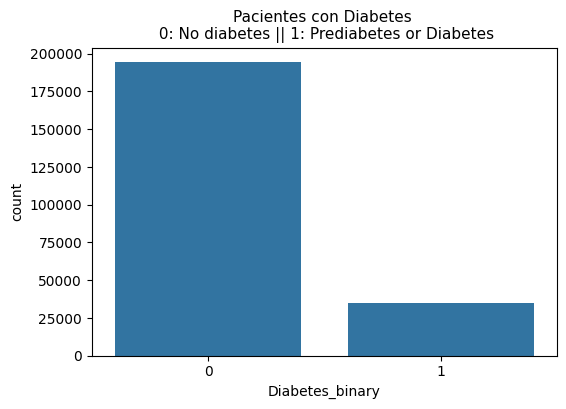

In [ ]:
# Exploración de las variables

# Diabetes

print("Proporción de la columna de diabetes:")
print(diab_df['Diabetes_binary'].value_counts(normalize=True),"\n")

# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=diab_df['Diabetes_binary'])
plt.title('Pacientes con Diabetes \n 0: No diabetes || 1: Prediabetes or Diabetes', fontsize=11)

plt.show()

In [ ]:
# Variables binarias

# Comprobamos que las variables binarias solo tienen valores de 0 a 1
for cat in cols_binarias:
  print(f"Valores de la variable {cat}:", diab_df[cat].unique())

Valores de la variable HighBP: [1 0]
Valores de la variable HighChol: [1 0]
Valores de la variable CholCheck: [1 0]
Valores de la variable Smoker: [1 0]
Valores de la variable Stroke: [0 1]
Valores de la variable HeartDiseaseorAttack: [0 1]
Valores de la variable PhysActivity: [0 1]
Valores de la variable Fruits: [0 1]
Valores de la variable Veggies: [1 0]
Valores de la variable HvyAlcoholConsump: [0 1]
Valores de la variable AnyHealthcare: [1 0]
Valores de la variable NoDocbcCost: [0 1]
Valores de la variable DiffWalk: [1 0]
Valores de la variable Sex: [0 1]


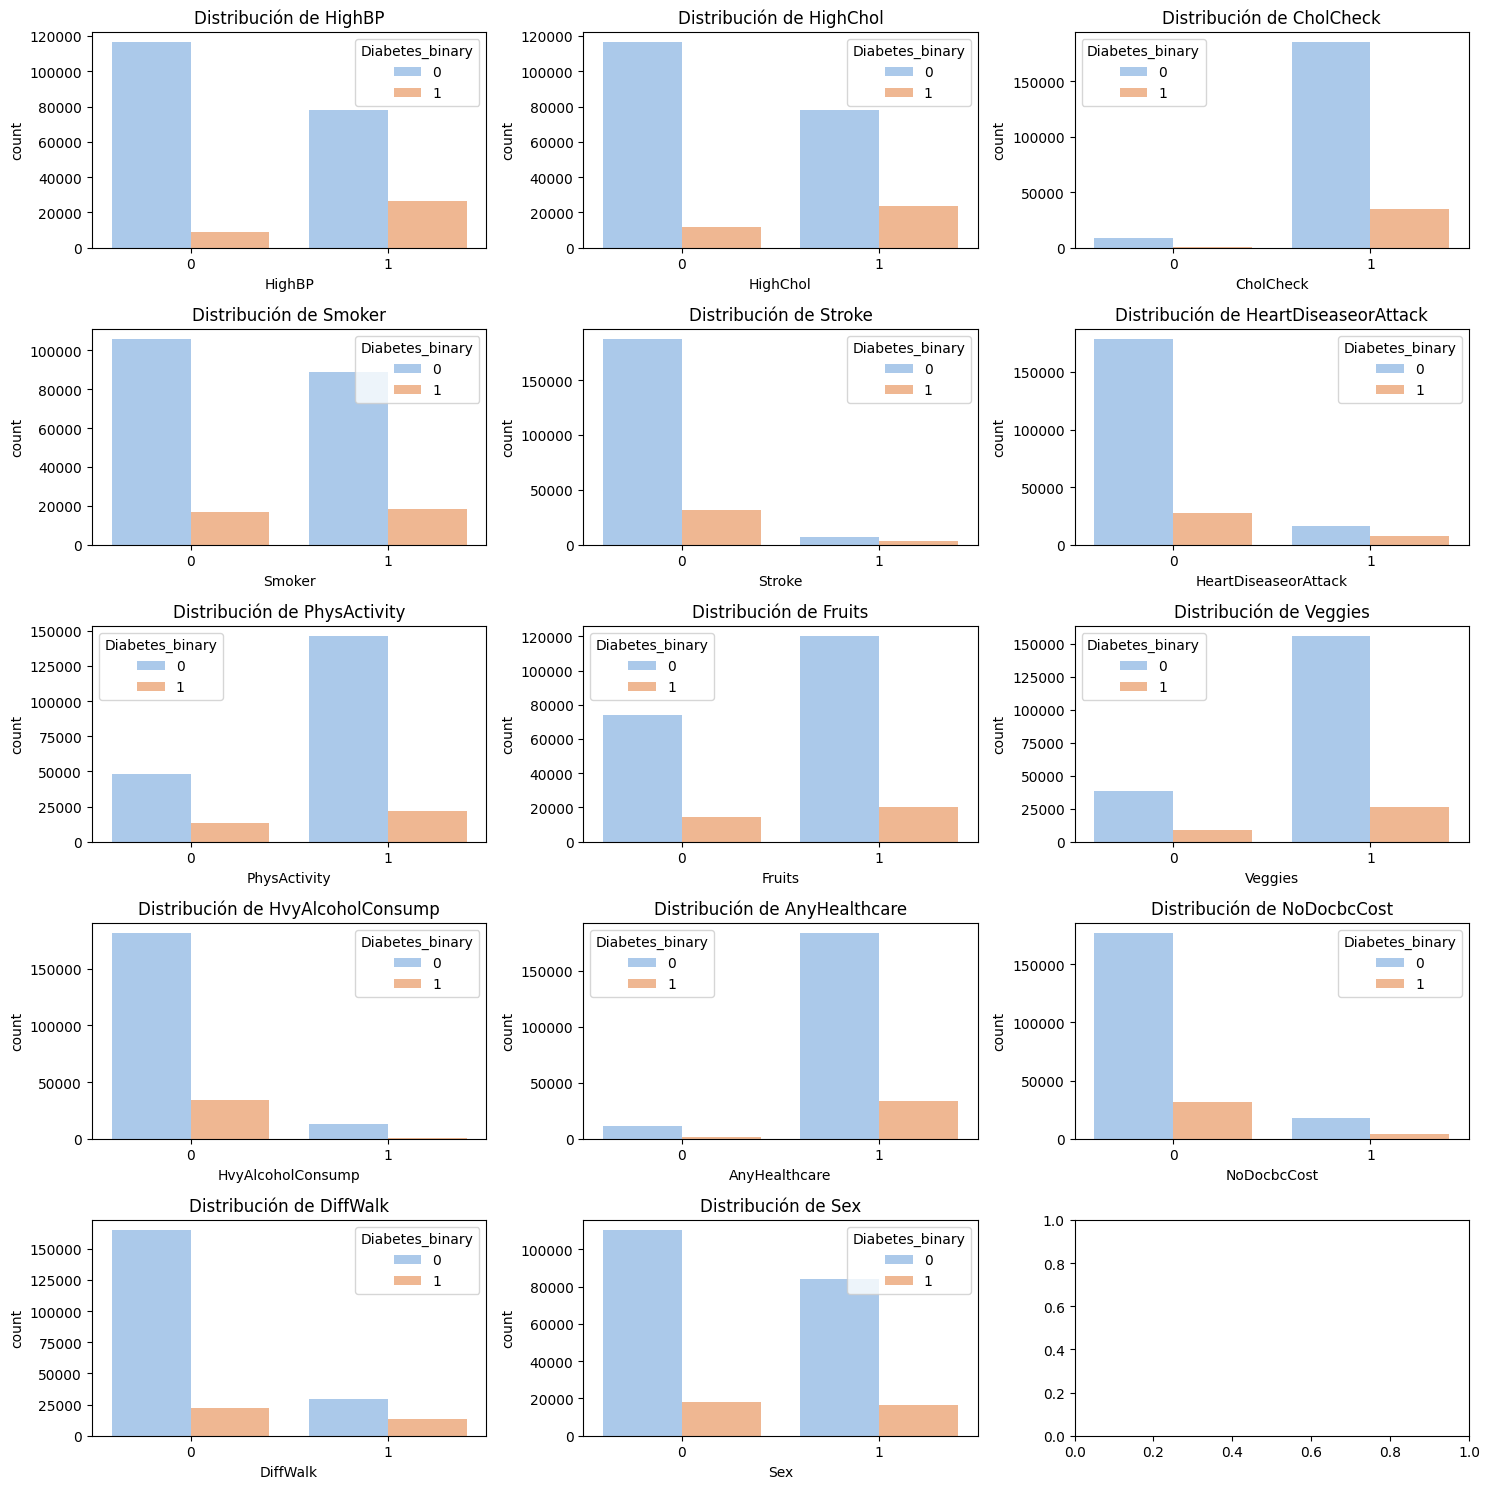

In [ ]:
# Especificamos las características del subplot
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Creamos un countplot para cada categoría en función de la clase diabates
for i, feature in enumerate(cols_binarias):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='Diabetes_binary', data=diab_df, ax=axes[row, col], palette='pastel')
    axes[row, col].set_title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Variables categóricas ordinales
var_cat = cols_ordinales

# Mostramos valor únicos de las columnas categóricas
for var in var_cat:
  print("----", var, "----")
  print(f"Los valores únicos de la columna ´{var} son {diab_df[var].unique()}")

---- GenHlth ----
Los valores únicos de la columna ´GenHlth son [5 3 2 4 1]
---- Age ----
Los valores únicos de la columna ´Age son [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
---- Education ----
Los valores únicos de la columna ´Education son [4 6 3 5 2 1]
---- Income ----
Los valores únicos de la columna ´Income son [3 1 8 6 4 7 2 5]


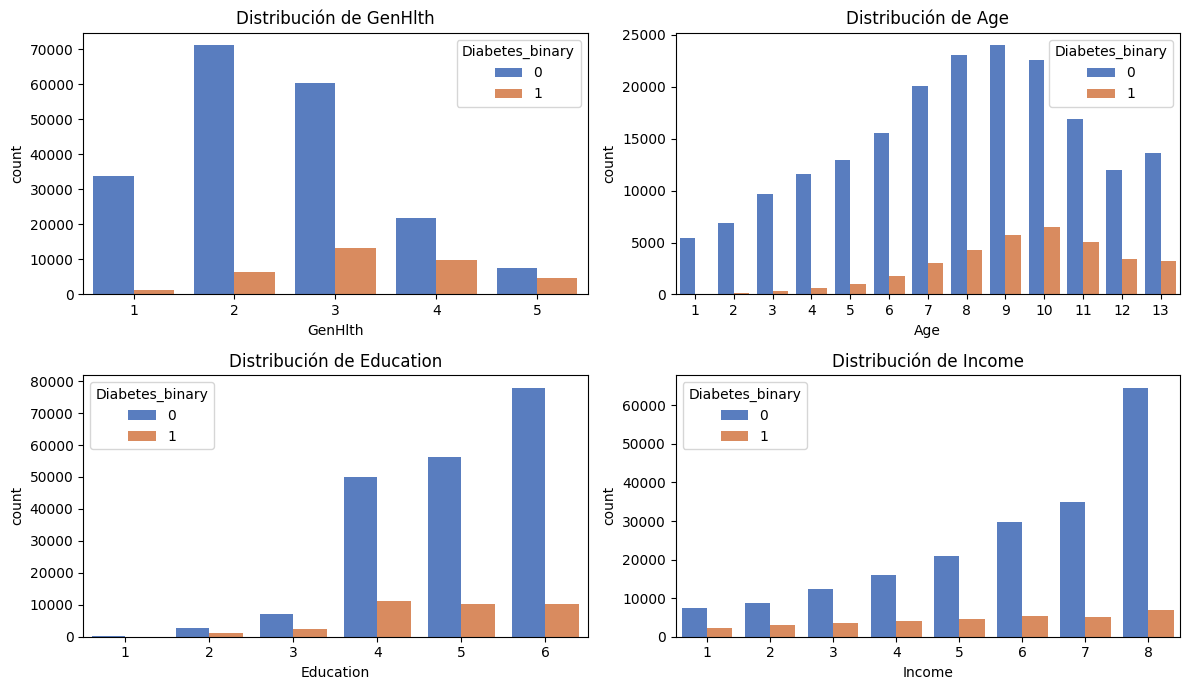

In [ ]:
# Especificamos las características del subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
fig.subplots_adjust(hspace=0.5)

# Mostramos la distrbución de cada categoría en función de la clase diabates
for i, feature in enumerate(cols_ordinales):
    row, col = i // 2, i % 2
    sns.countplot(x=feature, hue='Diabetes_binary', data=diab_df, ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Variables numéricas

# Mostramos los estadísticos básicos de las columnas numéricas
diab_df[cols_numericas].describe()

,BMI,MentHlth,PhysHlth
count,229474.000000,229474.000000,229474.000000
mean,28.687507,3.509866,4.681219
std,6.789204,7.717643,9.050877
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,32.000000,2.000000,4.000000
max,98.000000,30.000000,30.000000


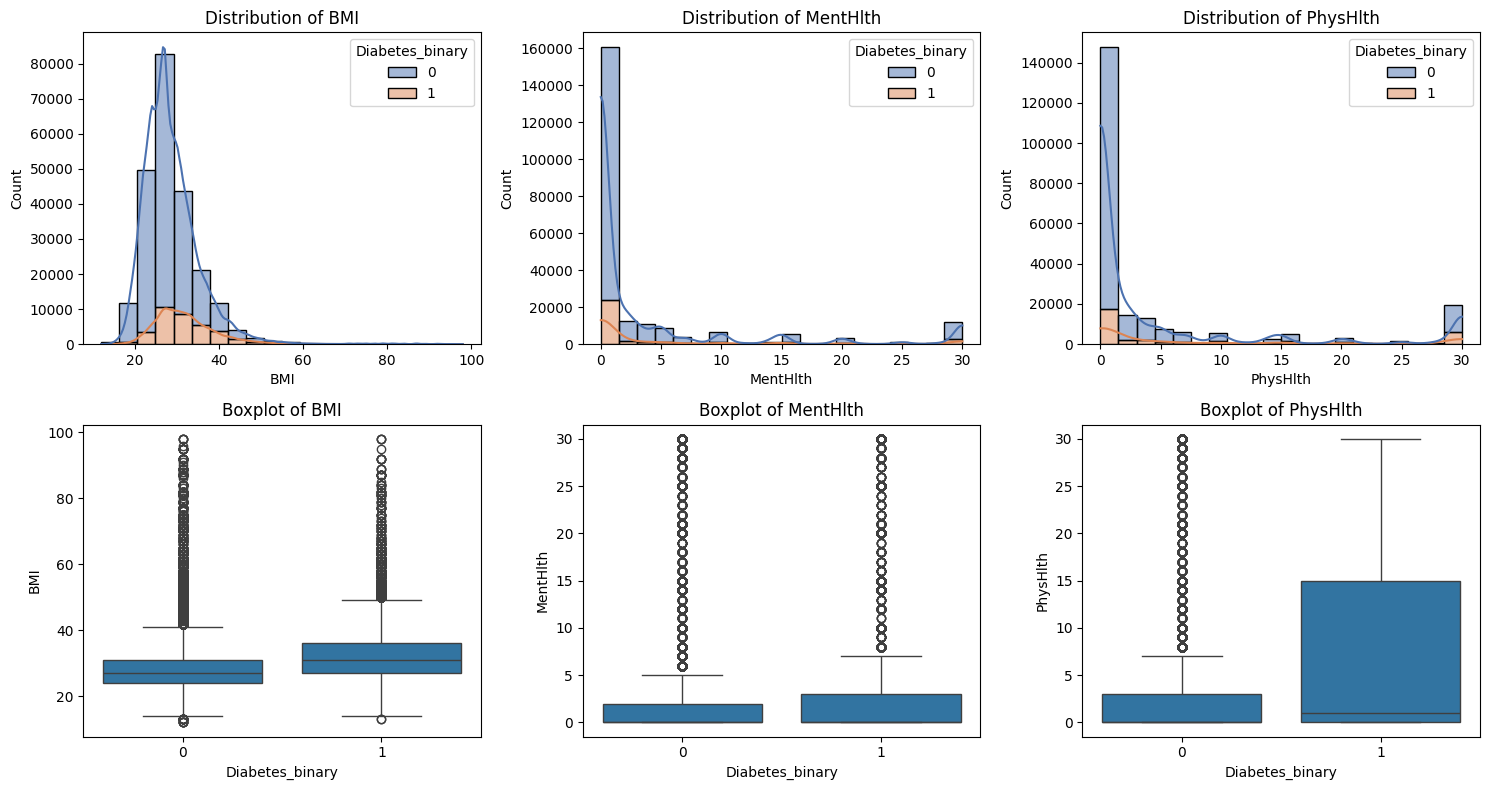

In [ ]:
# Muestra el histograma y el boxplot para cada variable numérica
plt.figure(figsize=(15, 8))

for i, feature in enumerate(cols_numericas, 1):
    plt.subplot(2, 3, i)
    sns.histplot(diab_df, x=feature, kde=True, bins=20, hue='Diabetes_binary', multiple='stack', palette='deep')
    plt.title(f'Distribution of {feature}')

    plt.subplot(2, 3, i + 3)
    sns.boxplot(diab_df, x= 'Diabetes_binary', y=diab_df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

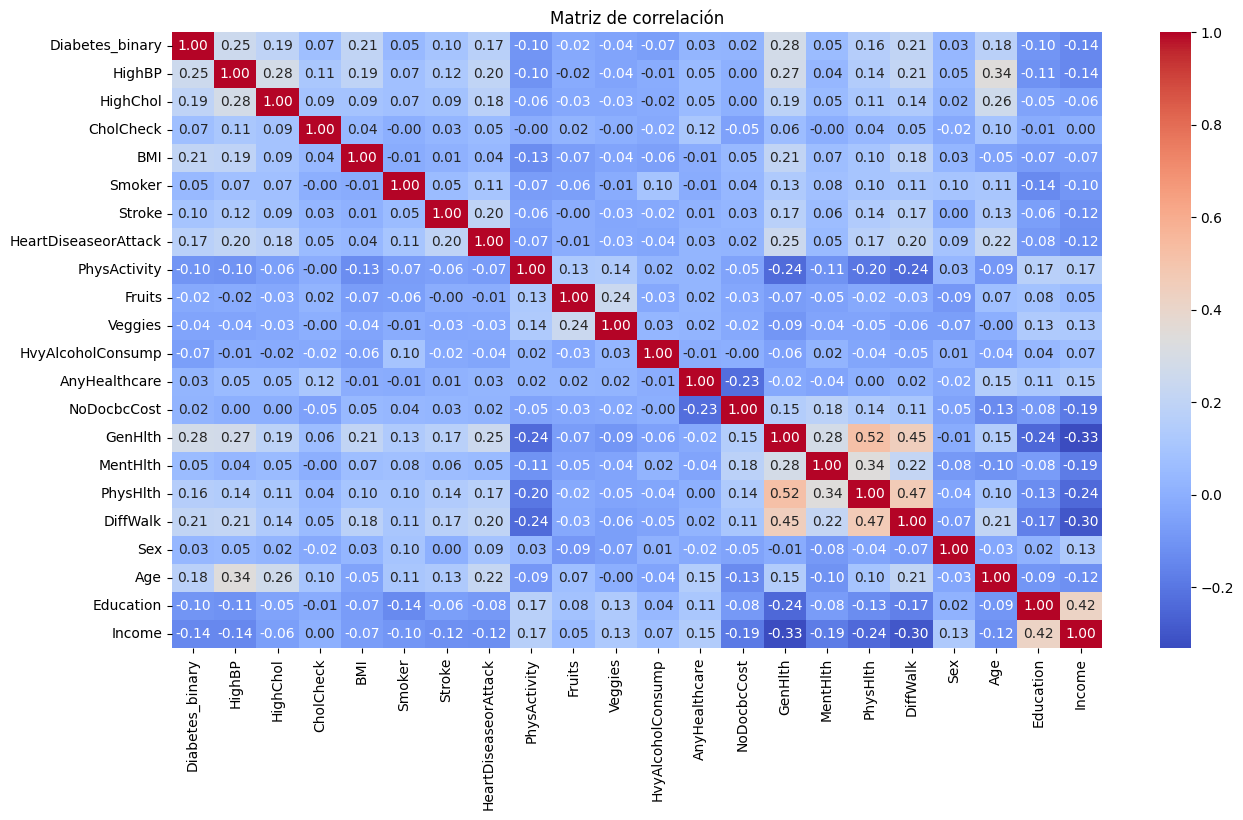

In [ ]:
# f) Calculamos la matriz de correlación
plt.figure(figsize=(15, 8))
sns.heatmap(diab_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Con la matriz de correlación podemos observar que no hay correlaciones muy fuertes entre las variables. Sin embargo, podemos destacar algunas relaciones:
- Una mayor dificultad para andar está relacionada con una peor condición física y de salud general.
- Hay una relación moderada entre el nivel de educación i el salario, siendo los individuos con más salario también los más educados. También se observa una ligera tendencia a tener peor estado de salud general cuando se tiene un salario más bajo, seguramente debido a mayor dificultad de acceso a la sanidad.
- A nivel de diabetes, se ve una ligera tendencia a tener diabetes cuando el BMI y la presión son altas, y cuando los indicadores de salud general son peores.

### Ejercicio 2

 **1.5 puntos**

Una vez hemos explorado los datos, vamos a realizar un primer análisis inferencial para identificar variables distintas entre los pacientes con y sin diabetes. En este análisis, vamos a usar solamente las variables numéricas y las variables categóricas ordinales.

a) Comprueba si las variables siguen una distribución normal.  **0.5 puntos**

b) Dependiendo del resultado del anterior apartado, usa un test paramétrico (t-test) o un test no paramétrico (U de Mann-Whitney) para encontrar diferencias entre los dos grupos. ¿Hay alguna variable que sea estadísticamente diferente entre los pacientes con o sin diabetes? Muestra también la media por grupo para estas variables.  **1 punto**

In [ ]:
# a) Comprobar normalidad

# Primero miramos la normalidad de los datos

# Cargamos las librerías necesarias
import scipy.stats as stats

cols_num = cols_ordinales + cols_numericas

for col in cols_num:
  print(col)
  # Prueba de Shapiro-Wilk
  stat, p_value = stats.shapiro(diab_df[col])

  # Imprimir el resultado
  print(f"Estadístico de prueba: {stat}")
  print(f"P-valor: {p_value}")

  # Interpretar el resultado
  if p_value > 0.05:
      print("Los datos parecen seguir una distribución normal.")
  else:
      print("Los datos no siguen una distribución normal.")

GenHlth
Estadístico de prueba: 0.9044152689523102
P-valor: 2.2977529949747139e-128
Los datos no siguen una distribución normal.
Age
Estadístico de prueba: 0.9619330112351888
P-valor: 1.4139416402036885e-102
Los datos no siguen una distribución normal.
Education
Estadístico de prueba: 0.837298765075897
P-valor: 1.329703422311601e-144
Los datos no siguen una distribución normal.
Income
Estadístico de prueba: 0.8679237107414385
P-valor: 4.0421296476608127e-138
Los datos no siguen una distribución normal.
BMI
Estadístico de prueba: 0.8765544130474726
P-valor: 4.73317662247359e-136
Los datos no siguen una distribución normal.
MentHlth
Estadístico de prueba: 0.5131203654395151
P-valor: 3.724217671703375e-181
Los datos no siguen una distribución normal.
PhysHlth
Estadístico de prueba: 0.5662742837563115
P-valor: 4.193978492968497e-177
Los datos no siguen una distribución normal.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 229474.



In [ ]:
#b) Análisis de inferencia

# Hacemos un primer análisis inferencial
# Para identificar variables relevantes

# Como la mayoría de los datos no son normales, debemos usar un test no paramétrico
for col in cols_num:
  print(col)
  # Calculamos la U de Mann-Whitney
  grupo1 = diab_df.loc[diab_df['Diabetes_binary']==0, col]
  grupo2 = diab_df.loc[diab_df['Diabetes_binary']==1, col]
  t_stat, p_value = stats.mannwhitneyu(grupo1, grupo2)

  # Imprimimos los resultados
  print(f"T-statistic: {t_stat}")
  print(f"P-value: {p_value}")

  # Interpretamos el resultado
  if p_value < 0.05:
      print("Hay una diferencia significativa entre los grupos.")
  else:
      print("No hay evidencia suficiente para rechazar la hipótesis nula.")

GenHlth
T-statistic: 1975876620.0
P-value: 0.0
Hay una diferencia significativa entre los grupos.
Age
T-statistic: 2456000619.0
P-value: 0.0
Hay una diferencia significativa entre los grupos.
Education
T-statistic: 3916973627.5
P-value: 0.0
Hay una diferencia significativa entre los grupos.
Income
T-statistic: 4155288864.5
P-value: 0.0
Hay una diferencia significativa entre los grupos.
BMI
T-statistic: 2220444097.0
P-value: 0.0
Hay una diferencia significativa entre los grupos.
MentHlth
T-statistic: 3323836882.5
P-value: 1.1018982373056867e-19
Hay una diferencia significativa entre los grupos.
PhysHlth
T-statistic: 2745384145.5
P-value: 0.0
Hay una diferencia significativa entre los grupos.


In [ ]:
# Miramos las medias por grupo
# Si que parece que hay una diferencia entre los pacientes con y sin diabetes
diab_df.groupby('Diabetes_binary')[cols_num].mean()

,GenHlth,Age,Education,Income,BMI,MentHlth,PhysHlth
Diabetes_binary,,,,,,,
0,2.476497,7.851984,5.023069,6.013705,28.095855,3.332277,4.080442
1,3.295894,9.375958,4.739778,5.195829,31.964242,4.493404,8.008491


Con el test estadístico podemos ver que todas las variables estudiadas son significativamente diferentes entre los pacientes con y sin diabetes. En general, los pacientes con diabetes son mayores, tienen un BMI más alto, y una peor condición de salud (general, física y mental), y también tenen un nivel de estudios y salario ligeramente menor.

### Ejercicio 3

 **3.5 puntos**

La diabetes es una enfermedad muy prevalente, por eso es importante poder distingir si un paciente puede tener diabetes a partir de sus características clínicas. En este ejercicio, vamos a crear un modelo de clasificación para ayudar a los doctores a identificar correctamente qué pacientes pueden tener diabetes.

a) Antes de poder aplicar un modelo a estos datos, tenemos que aplicar una técnica de escalado. En este caso, estandariza los datos con la función `StandardScaler()` de la librería sklearn.  **0.25 puntos**

b) Separa los datos en un conjunto de train y de test, con un porcentaje de 80%-20%. El conjunto de train se usará para entrenar los datos y el conjunto de test, para validar los resultados del modelo. **0.25 puntos**

c) Aplica una regresión logística a los datos y muestra las métricas del modelo (accuracy, precision, recall, F2). ¿Es la accuracy una buena métrica para evaluar este modelo? ¿Son los resultados aceptables? Muestra también la matriz de confusión para ver como se distribuyen los resultados. **1 punto**

d) Con este primer modelo hemos podido ver que, al tener un dataset no balanceado, el modelo no puede predecir bien la clase minoritaria (en este caso, los pacientes con diabetes). Para mitigar este problema, aplica una técnica de SMOTE para augmentar el número de muestras de la clase minoritaria. A continuación, vuelve a aplicar la regresión logísitca y saca las métricas de este nuevo modelo. ¿Son los resultados mejores?  **1 punto**

e) Para poder interpretar bien los datos, es necesario entender qué variables contribuyen más al modelo, es decir, qué variables son más importantes. Usa la función [permutation_importance](https://scikit-learn.org/stable/modules/permutation_importance.html) de sklearn para identificar las variables más relevantes del modelo. **Razona la respuesta.** **1 punto**

f) Compara la matriz de confusión con los datos balanceados y no balanceados. ¿Hay diferencias? **Opcional**

In [ ]:
# a) Estandarización de las variables

# Tenemos que escalar las variables para aplicar los modelos

# Cargamos la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Aplicamos el escalado a las variables numéricas y ordinales
cols_num = cols_numericas+cols_ordinales

# Creamos una instancia de StandardScaler
scaler = StandardScaler()

# Aplicamos el escalado estándar solo a las columnas numéricas
diab_df[cols_num] = scaler.fit_transform(diab_df[cols_num])

In [ ]:
# Comprobamos que la estandarización ha sido correcta
diab_df[cols_num].describe()

,BMI,MentHlth,PhysHlth,GenHlth,Age,Education,Income
count,2.294740e+05,2.294740e+05,2.294740e+05,2.294740e+05,2.294740e+05,2.294740e+05,2.294740e+05
mean,-1.622745e-16,-2.905776e-17,2.416738e-17,-1.181276e-16,-2.358836e-16,3.575255e-16,-7.524246e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.457953e+00,-4.547857e-01,-5.172127e-01,-1.504113e+00,-2.289609e+00,-4.007847e+00,-2.335828e+00
25%,-6.904369e-01,-4.547857e-01,-5.172127e-01,-5.651104e-01,-6.738102e-01,-9.866598e-01,-9.023985e-01
50%,-2.485580e-01,-4.547857e-01,-5.172127e-01,3.738922e-01,-2.749070e-02,2.040245e-02,5.322092e-02
75%,4.879070e-01,-1.956387e-01,-7.526566e-02,3.738922e-01,6.188288e-01,1.027465e+00,1.008840e+00
max,1.020924e+01,3.432420e+00,2.797390e+00,2.251897e+00,1.588308e+00,1.027465e+00,1.008840e+00


In [ ]:
# b) Separar datos en train (80%) y test (20%)

# Creamos un modelo de clasificación para predecir
# si el paciente tiene o no diabetes

# Separamos los datos en X (características) e y (target)

X = diab_df.drop(columns=target).values
y = diab_df[target].values.reshape(-1,1)

# Separamos los datos en conjunto de train y test
# Usaremos un test size de 0.2
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=308)

In [ ]:
#c) Modelo de clasificación (LR)

# Usamos una regresión logística (LR)
model = LogisticRegression()

# Aplicamos la LR a nuestro subset de entrenamiento
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [ ]:
# Revisamos la accuracy

# Accuracy en el subset de train
print("Accuracy train: ",metrics.accuracy_score(y_train,model.predict(x_train)))

# Accuracy en el subset de test
print("Accuracy test: ",metrics.accuracy_score(y_test,model.predict(x_test)))

# Accuracy en todo el conjunto
print("Accuray", metrics.accuracy_score(y,model.predict(X)))

# Informe general
print(metrics.classification_report(y,model.predict(X)))

# La accuracy es buena en global
# pero el modelo no predice bien la clase 1 (diabetes)

Accuracy train:  0.8507563501271932
Accuracy test:  0.8491774703126702
Accuray 0.8504405727882026
              precision    recall  f1-score   support

           0       0.86      0.98      0.92    194377
           1       0.54      0.15      0.23     35097

    accuracy                           0.85    229474
   macro avg       0.70      0.56      0.58    229474
weighted avg       0.81      0.85      0.81    229474



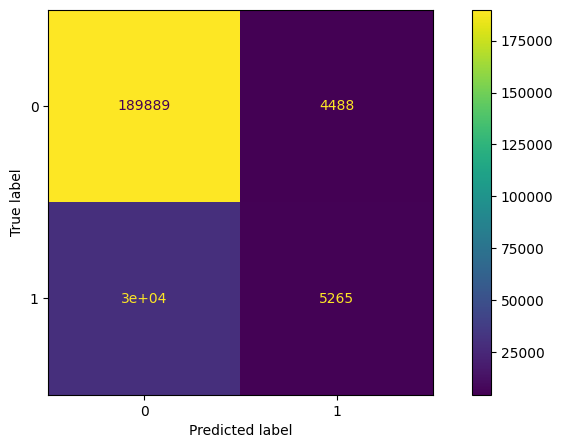

In [ ]:
# Calculamos la matriz de confusión
cm = metrics.confusion_matrix(y,model.predict(X))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
fig , ax = plt.subplots(figsize=(10,5))
cm_display.plot(ax=ax)
plt.show()

A primer vistazo, si solo miramos la accuracy, podemos pensar que el modelo es bueno. Sin embargo, si nos fijamos en otras métricas como el recall y F1, podemos ver que el modelo solo clasifica mayoritariamente todos los pacientes como "no diabetes". Al ser un dataset no balanceado, aunque no se identifique correctamente ningún paciente con diabetes, medidas como la accuracy o la precision seguirán siendo buenas. Por eso, tenemos que siempre fijarnos en las métricas más adecuadas según el problema a tratar. En este caso, dado que es un análisis de datos clínicos, queremos identificar correctamente los pacientes con diabetes, por lo tanto, nos interesa sobretodo mejorar el recall. Para ello, vamos a probar de balancear el dataset.

In [ ]:
#d)

# Tenemos un dataset no balanceado!
# Por lo tanto, tenemos que aplicar técnicas de over/undersampling
# En este caso vamos a aplicar la técnica de SMOTE

# Cargamos la función SMOTE y la aplicamos a los datos de entrenamiento
B_method = over_sampling.SMOTE()
x_SMT , y_SMT = B_method.fit_resample(x_train,y_train)

# Ponemos los nuevos datos en formato DataFrame
# y con el nombre de las columnas originales
diab_x_cols = diab_df.drop(columns=target).columns
diab_smt_df = pd.DataFrame(x_SMT, columns=diab_x_cols)
diab_smt_df['Diabetes_binary']=y_SMT
diab_smt_df = diab_smt_df.reset_index(drop=True)


In [ ]:
# Creamos una función para mostrar la nueva distribución
def shareplot(df,target):
    dfi = df.groupby(target).size().reset_index(name="Count")
    fig = px.pie(dfi, values='Count', names=target)
    fig.update_traces(textposition='auto', textinfo='percent+label',sort=False,showlegend=False,rotation=90)
    fig.update_layout(title_text='Class label shares',title_x=0.5)
    fig.show()

In [ ]:
# Ahora tenemos el dataset balanceado!
shareplot(diab_smt_df, 'Diabetes_binary')

Accuracy train:  0.7410368684335739
Accuracy test:  0.718095653121255
Accuray 0.7180639200955228
              precision    recall  f1-score   support

           0       0.94      0.71      0.81    194377
           1       0.32      0.75      0.45     35097

    accuracy                           0.72    229474
   macro avg       0.63      0.73      0.63    229474
weighted avg       0.85      0.72      0.76    229474



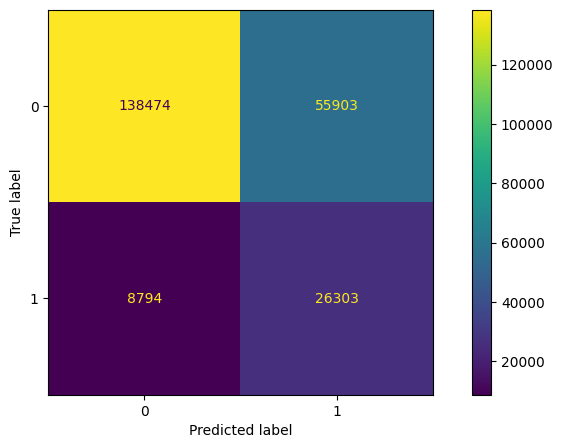

In [ ]:
# Creamos un modelo de clasificación para predecir
# si el paciente tiene o no diabetes

# Usamos una regresión logística (LR)
model = LogisticRegression()

# Aplicamos la LR a nuestro subset de entrenamiento después del SMOTE
model.fit(x_SMT,y_SMT)

# Revisamos la accuracy

# Accuracy en el subset de train
print("Accuracy train: ",metrics.accuracy_score(y_SMT,model.predict(x_SMT)))

# Accuracy en el subset de test
print("Accuracy test: ",metrics.accuracy_score(y_test,model.predict(x_test)))

# Accuracy en todo el conjunto
print("Accuray", metrics.accuracy_score(y,model.predict(X)))

# Informe general
print(metrics.classification_report(y,model.predict(X)))

# Calculamos la matriz de confusión
cm = metrics.confusion_matrix(y,model.predict(X))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
fig , ax = plt.subplots(figsize=(10,5))
cm_display.plot(ax=ax)
plt.show()

# ¡Ahora los resultados para los pacientes con diabetes han mejorado!

Los resultados después del SMOTE son mucho mas adecuados para el contexto clínico. Hemos empeorado un poco la accuracy global y la precision, pero hemos mejorado el recall y el f1. En este caso, nos interesa mucho más un modelo que identifique correctamente los pacientes con diabetes (pocos falsos negativos). Si hay gente que no tiene diabetes y se identifica como diabética (falsos positivos), a nivel de salud, no hay ningún problema y seguramente serán corregidos en alguna etapa posterior. En cambio, que un paciente con diabetes no sea identificado tiene un impacto importante para su salud.

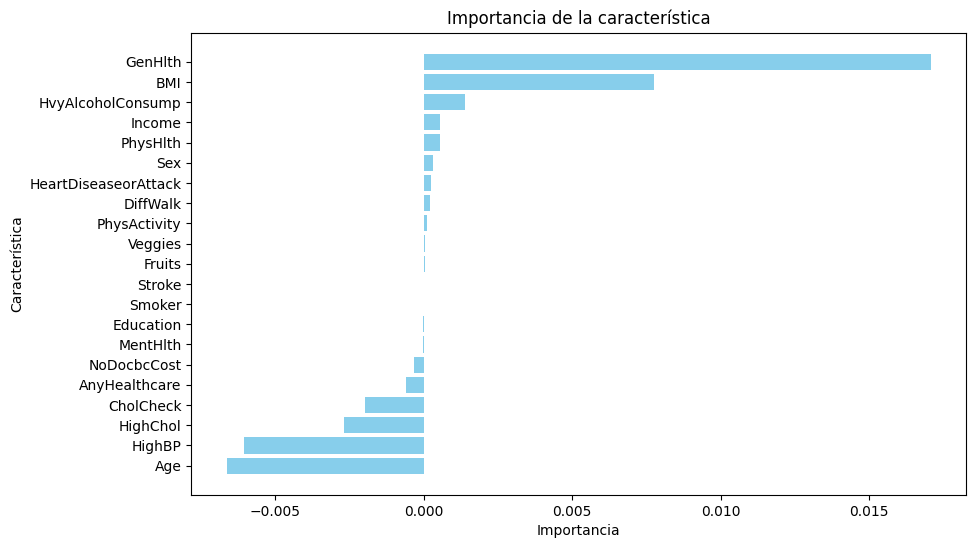

In [ ]:
# e) Calculamos la importancia de las variables con la función permutation_importance
from sklearn.inspection import permutation_importance
model_fi = permutation_importance(model, X, y)

# Creamos un df con el valor de la importancia y el nombre de la variable
feature_imp = pd.DataFrame(model_fi['importances_mean'], columns=['feature_importance'])
feature_imp['feature_name'] = diab_x_cols

# Ordenamos el df de mayor a menor importancia
feature_imp.sort_values(by='feature_importance', ascending=False, inplace=True)

# Creamos un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_imp['feature_name'], feature_imp['feature_importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de la característica')
plt.gca().invert_yaxis()
plt.show()


Las variables con mayor importancia para el modelo son la escala de salud general y física, el BMI, y en menor medida la ingesta de alcohol, las cardiopatias vasculares y el género. Esta información está aliniada con los análisis que se han hecho anteriormente, dónde observamos que los pacientes con diabetes tienden a tener mayor BMI y peor condición física general.

También podemos observar algunos variables con valor negativo, cosa que indica que no ayudan al modelo, y normalmente añaden ruido. En este caso, se debería hacer un análisis un poco más exhaustivo para entender el motivo y, si es necesario, se podrían excluir del análisis.

In [ ]:
# Otra opción: eli5

# Instalamos y cargamos la librería eli5
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

# Calculamos la importancia
perm = PermutationImportance(model, random_state=1).fit(X, y)

# Mostramos los resultados
eli5.show_weights(perm, feature_names = diab_df.drop(columns=target).columns.tolist())

Weight,Feature
0.0171 ± 0.0005,GenHlth
0.0077 ± 0.0006,BMI
0.0014 ± 0.0005,HvyAlcoholConsump
0.0007 ± 0.0001,PhysHlth
0.0003 ± 0.0004,Income
0.0003 ± 0.0001,HeartDiseaseorAttack
0.0001 ± 0.0001,PhysActivity
0.0001 ± 0.0002,DiffWalk
0.0001 ± 0.0003,Sex
0.0001 ± 0.0001,Fruits


**f) Comparar matriz de confusión**

Podemos observar que la matriz de confusión después de aplicar le técnica de SMOTE da mejores resultados en la detección de pacientes con diabetes.

En el primer modelo, la accuracy era alta, pero porque la mayoría de pacientes se clasificaban como no diabéticos (el recall y el f1 score eran muy bajos). Al tener un dataset más balanceado, perdemos un poco de accuracy, pero se compensa con unos mejores resultados en las métricas que nos interesan (recall y f1).

### Ejercicio 4

 **3 puntos**

Ahora vamos a intentar identificar patrones distintos entre los pacientes con diabetes. Para lograrlo, usaremos algoritmos no supervisados.

a) En este ejercicio vamos a usar un subset de los datos originales, `diabetes_binary_health_indicators_subset.csv`, para que los resultados sean más interpretables. Carga este archivo en formato DataFrame y muestra su tamaño, columnas y 5 primeras filas.  **0.5 puntos**

b) Crea un nuevo dataset con solo los datos de los pacientes. A continuación, aplica un algoritmo K-Means a los datos. Para seleccionar el número de clusters óptimo, usa el método de Elbow para identificar el punto óptimo de separación. ¿Qué número de clusters os parece mejor? Cread una nueva columna con la información del cluster, es decir, para cada muestra indicará a qué cluster pertenece. **1.5 puntos**

**Opcional**: Usa un cluster jerárquico para separar los pacientes con diabetes. ¿Qué número de grupos te parece más óptimo? Podéis consultar este [link](https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp) para más información.

c) Una vez tenemos los grupos definidos por el algoritmo no supervisado, queremos explorar las diferencias. Usa el test estadístico apropiado para detectar si hay diferencias entre las variables numéricas y ordinales del subset de pacientes con diabetes. ¿Qué variables son significativamente diferentes entre los grupos? Muestra esta información de manera gráfica con boxplots. **1 punto**


In [ ]:
# a) Cargamos el archivo csv en un DataFrame

# Es un subset con menos pacientes para que sea mas sencillo de interpretar
diab_df = pd.read_csv("data/diabetes_binary_health_indicators_subset.csv")

# Mostramos el tamaño del df
print("Tamaño df:\n", diab_df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", diab_df.columns)

# Visualizamos las 5 primeras filas con el comando head()
diab_df.head()

Tamaño df:
 (2536, 22)
Columnas del df:
 Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,10.0,30.0,1.0,0.0,9.0,3.0,1.0
1,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,6.0
2,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,5.0,8.0
3,0.0,0.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,4.0,6.0
4,0.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,5.0,5.0,25.0,1.0,0.0,6.0,4.0,5.0


<ipython-input-127-858b11ebfb07>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



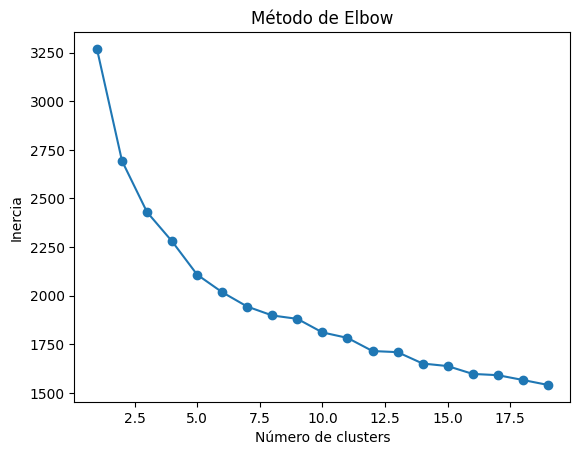

In [ ]:
# b) Clustering KMeans

# Importamos la librería KMeans y la función StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Queremos identificar subgrupos en los pacientes
# Vamos a quedarnos solo con los pacientes en el df
diab_patients_df = diab_df[diab_df['Diabetes_binary'] == 1]

# Hacemos una copia del df para tenerlo sin estandarizar
diab_patients_orig = diab_patients_df.copy()

# Antes del KMeans aplicamos el escalado a las variables numéricas y ordinales
cols_num = cols_numericas+cols_ordinales

# Creamos una instancia de StandardScaler
scaler = StandardScaler()

# Aplicamos el escalado estándar solo a las columnas numéricas
diab_patients_df[cols_num] = scaler.fit_transform(diab_patients_df[cols_num])

# Vamos a evaluar de 1 a 20 grupos
# Y para cada iteracion vamos a calcular la inercia
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(diab_patients_df.drop(columns=target))
    inertia.append(kmeans.inertia_)

# Hacemos el gráfico de la inercia vs el número de clusters
plt.plot(range(1, 20), inertia, marker="o")

# Añadimos la información de los ejes
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método de Elbow")
plt.show()

In [ ]:
# Vamos a usar 5 grupos en el KMeans, pero 4-6 también sería una buena opción
kmeans = KMeans(n_clusters=5, random_state=42).fit(diab_patients_df)

# Vamos a guardar la información del clustering en el dataset estandarizado y sin estandarizar
diab_patients_df['Clustering_KMeans'] = kmeans.labels_
diab_patients_orig['Clustering_KMeans'] = kmeans.labels_

<ipython-input-128-f750e0099aa0>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Opcional) Clustering jerárquico (hierarchical clustering)

# Importamos la librería de scipy con las funciones necesarias
from scipy.cluster.hierarchy import linkage, dendrogram

# Creamos el clustering con los 2 métodos: ward y single
ward_clustering = linkage(diab_patients_df.drop(columns=target), method="ward", metric="euclidean")

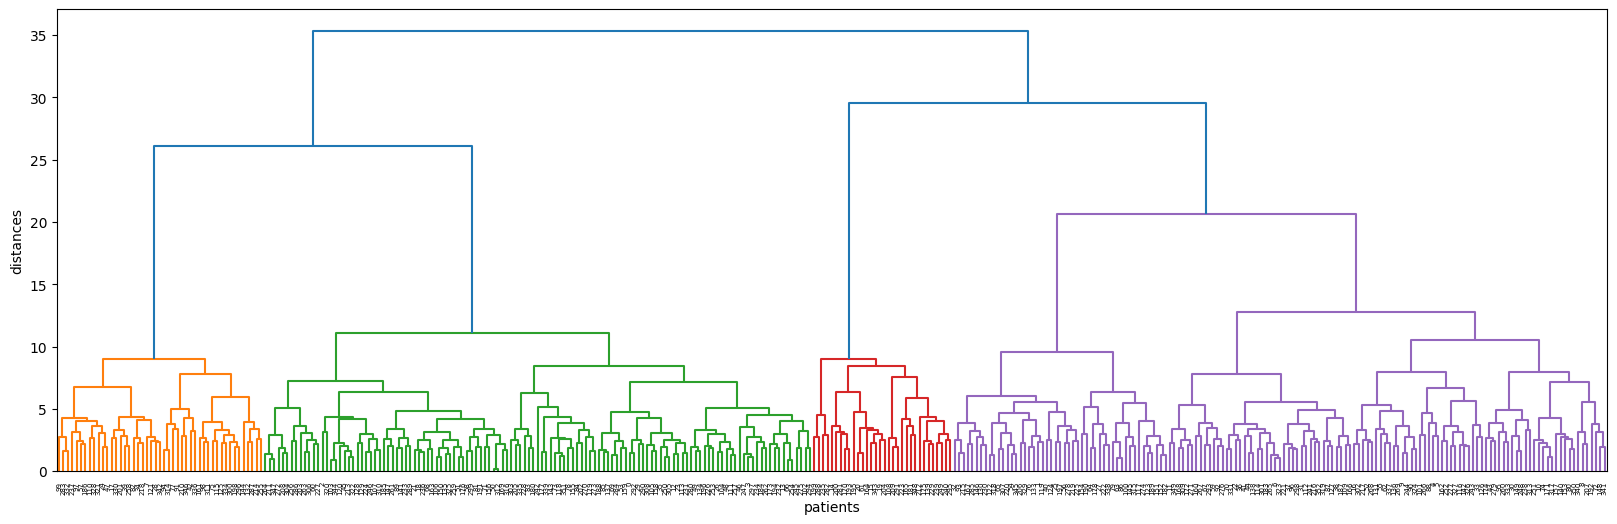

In [ ]:
# Especificamos el tamaño de la figura
plt.figure(figsize=(20,6))

# Mostramos el dendograma
dendrogram(ward_clustering)

# Añadimos una linea para que marque el punto óptimo de separación
plt.axhline(linestyle='--', y=150, color='r')

# Añadimos nombre de los ejes
plt.xlabel('patients')
plt.ylabel('distances');
plt.show()

In [ ]:
#c) Identificar características diferentes entre grupos

# Cargamos las librerías necesarias
from scipy.stats import kruskal

cols_num = cols_ordinales + cols_numericas

for col in cols_num:
  print(col)
  # Usamos el método Kruskal-Wallis (más de 2 grupos no paramétrico)
  grupo1 = diab_patients_orig.loc[diab_patients_orig['Clustering_KMeans']==0, col]
  grupo2 = diab_patients_orig.loc[diab_patients_orig['Clustering_KMeans']==1, col]
  grupo3 = diab_patients_orig.loc[diab_patients_orig['Clustering_KMeans']==2, col]
  grupo4 = diab_patients_orig.loc[diab_patients_orig['Clustering_KMeans']==3, col]
  grupo5 = diab_patients_orig.loc[diab_patients_orig['Clustering_KMeans']==4, col]
  t_stat, p_value = kruskal(grupo1, grupo2, grupo3, grupo4, grupo5)

  # Imprimimos los resultados
  print(f"H-statistic: {t_stat}")
  print(f"P-value: {p_value}")

  # Interpretamos el resultado
  if p_value < 0.05:
      print("Hay una diferencia significativa entre los grupos.")
  else:
      print("No hay evidencia suficiente para rechazar la hipótesis nula.")

GenHlth
H-statistic: 139.75123009135038
P-value: 3.190823682207666e-29
Hay una diferencia significativa entre los grupos.
Age
H-statistic: 103.00973599613127
P-value: 2.2486383244474497e-21
Hay una diferencia significativa entre los grupos.
Education
H-statistic: 107.13547201821407
P-value: 2.970050123493332e-22
Hay una diferencia significativa entre los grupos.
Income
H-statistic: 136.1151434740506
P-value: 1.9150646780673375e-28
Hay una diferencia significativa entre los grupos.
BMI
H-statistic: 88.87409687468438
P-value: 2.2837322438662957e-18
Hay una diferencia significativa entre los grupos.
MentHlth
H-statistic: 144.85959953594866
P-value: 2.5704548468680995e-30
Hay una diferencia significativa entre los grupos.
PhysHlth
H-statistic: 189.704284178452
P-value: 6.135358110178106e-40
Hay una diferencia significativa entre los grupos.


In [ ]:
cols_num

['GenHlth', 'Age', 'Education', 'Income', 'BMI', 'MentHlth', 'PhysHlth']

<Axes: xlabel='Clustering_KMeans', ylabel='Income'>

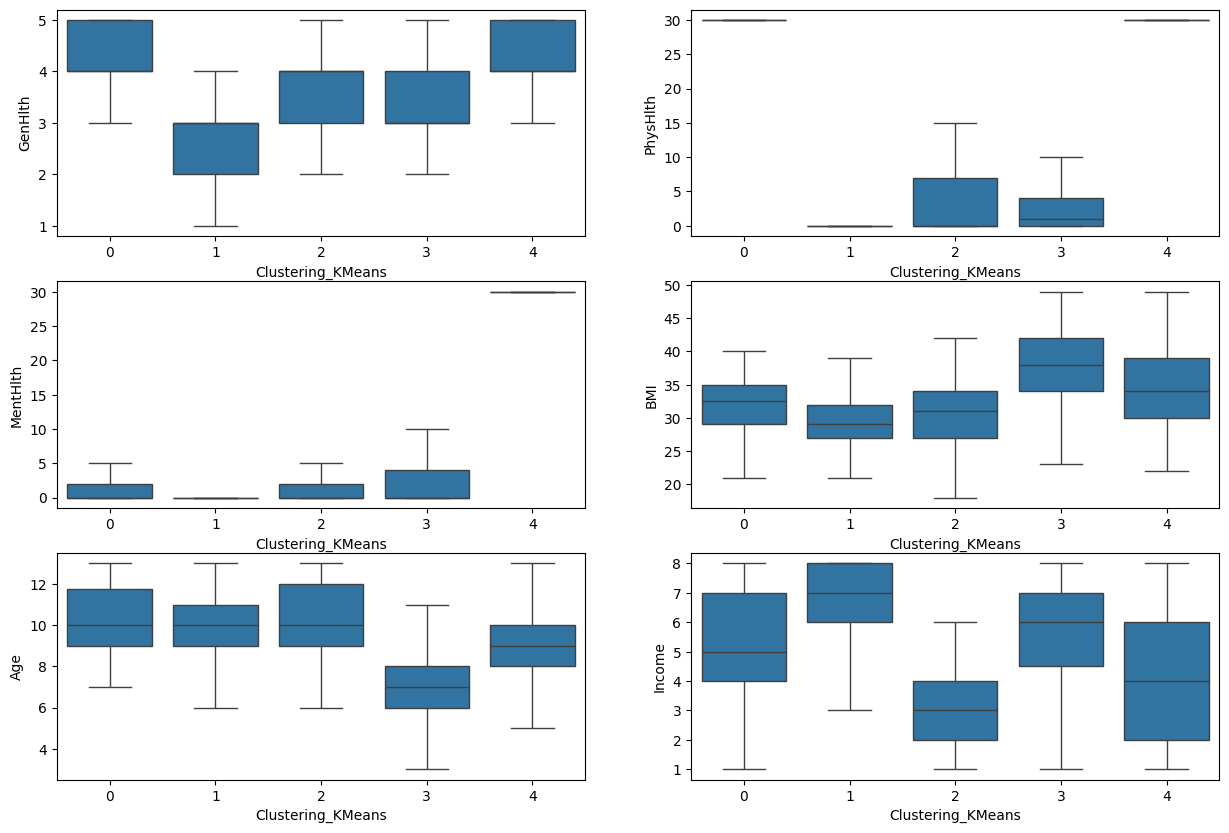

In [ ]:
#Boxplot de las variables relevantes por grupo

# Especificamos el tamaño del subplot
f, axes = plt.subplots(3, 2, figsize=(15,10))

# Creamos el boxplot para cada variable
sns.boxplot(y="GenHlth", x= 'Clustering_KMeans', data=diab_patients_orig,  orient='v', showfliers = False, ax=axes[0][0])
sns.boxplot(y="PhysHlth", x= 'Clustering_KMeans', data=diab_patients_orig,  orient='v', showfliers = False, ax=axes[0][1])
sns.boxplot(y="MentHlth", x= 'Clustering_KMeans', data=diab_patients_orig,  orient='v', showfliers = False, ax=axes[1][0])
sns.boxplot(y="BMI", x= 'Clustering_KMeans', data=diab_patients_orig,  orient='v', showfliers = False, ax=axes[1][1])
sns.boxplot(y="Age", x= 'Clustering_KMeans', data=diab_patients_orig,  orient='v', showfliers = False, ax=axes[2][0])
sns.boxplot(y="Income", x= 'Clustering_KMeans', data=diab_patients_orig,  orient='v', showfliers = False, ax=axes[2][1])

Con el análisis no supervisado de clustering hemos podido identificar 5 subgrupos de pacientes. Si nos fijamos en las variables numéricas y ordinales podemos hacer un profiling de cada uno:

- Cluster 0: Pacientes mayores con peor escala de salud general y física, con BMI y salario en la media.
- Cluster 1: Pacientes mayores con mejor condición de salud general, física y mental, con un BMI medio y salario alto.
- Cluster 2: Pacientes mayores con una condición de salud general, física y mental moderada, con un BMI medio y salario bajo.
- Cluster 3: Pacientes jóvenes con condición de salud general, física y mental media, con BMI y salario en la media.
- Cluster 0: Pacientes no muy mayores con peor escala de salud, sobretodo mental, con un BMI medio y salario bajo.

## Análisis epidemiológico

### Ejercicio 5

 **2 puntos**

 a) Usa la librería ipywidgets para crear un gráfico interactivo del modelo SEIRD. Ten en cuenta los siguientes puntos:

 - Usa la función `sierd_model` definida en la parte práctica de la sesión.
 - El usuario debe poder modificar, a través de los widgets, los parámetros de las tasas y las condiciones iniciales.
    - Las tasas tienen un valor mínimo de 0.01 y valor máximo de 1 (0.01-1), excepto la tasa de mortalidad, que tiene un mínimo de 0.001 y un máximo de 0.1 (0.001-0.1).
    - Las condiciones iniciales (S0, E0, I0, R0 y D0) pueden ir de 0 a 1 (0-1).
  
- Al actualizar las condiciones, el gráfico se tiene que actualizar también de manera dinámica.

**Nota**: Puedes usar los valores especificados en la parte práctica como valores por defecto.

**1 punto**

b) Modifica los valores de las tasas y las condiciones iniciales. ¿Como impactan estos parámetros a las simulaciones del modelo SEIRD? Por ejemplo, ¿qué pasa si tenemos una tasa de transmisión/mortalidad más alta? ¿Y si tenemos población infectada (I0) des del inicio? **Razona la respuesta.**

**0.5 puntos**


c) ¿Qué factores no se están teniendo en cuenta en el modelo SEIRD, pero sería relevante incluir? **Razona la respuesta.**

**0.5 puntos**

In [ ]:
# Cargamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets
from IPython.display import display

# Definimos las equaciones del modelo SEIRD
def sierd_model(t, y, beta, sigma, gamma, delta):
    S, E, I, R, D = y
    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I - delta * I
    dRdt = gamma * I
    dDdt = delta * I
    return [dSdt, dEdt, dIdt, dRdt, dDdt]

# Definimos la función con el gráfico a representar
def plot_sierd(beta, sigma, gamma, delta, S0, E0, I0, R0, D0):
    t_span = (0, 160)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    solution = solve_ivp(sierd_model, t_span, [S0, E0, I0, R0, D0], args=(beta, sigma, gamma, delta), t_eval=t_eval)

    plt.figure(figsize=(10, 5))
    plt.plot(solution.t, solution.y[0], label='Susceptibles')
    plt.plot(solution.t, solution.y[1], label='Expuestos')
    plt.plot(solution.t, solution.y[2], label='Infectados')
    plt.plot(solution.t, solution.y[3], label='Recuperados')
    plt.plot(solution.t, solution.y[4], label='Muertos')
    plt.xlabel('Tiempo')
    plt.ylabel('Proporción de la Población')
    plt.legend()
    plt.title('Modelo SIERD')
    plt.show()

# Creamos los widgets interactivos y vinculamos el gráfico con estos
widgets.interact(
    plot_sierd,
    beta=widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.3, description='Tasa β'),  # Tasa de transmisión
    sigma=widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.1, description='Tasa σ'), # Tasa de progreso de expuesto a infectado
    gamma=widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.1, description='Tasa γ'), # Tasa de recuperación
    delta=widgets.FloatSlider(min=0.001, max=0.1, step=0.001, value=0.02, description='Tasa δ'), # Tasa de mortalidad
    S0=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.99, description='S0'),
    E0=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.01, description='E0'),
    I0=widgets.FloatSlider(min=0, max=1, step=0.01, value=0, description='I0'),
    R0=widgets.FloatSlider(min=0, max=1, step=0.01, value=0, description='R0'),
    D0=widgets.FloatSlider(min=0, max=1, step=0.01, value=0, description='D0')
)

interactive(children=(FloatSlider(value=0.3, description='Tasa β', max=1.0, min=0.01, step=0.01), FloatSlider(…

<function __main__.plot_sierd(beta, sigma, gamma, delta, S0, E0, I0, R0, D0)>

**Apartado b**

En un modelo SEIRD, si modificamos las tasas iniciales podemos ver cambios respecto a la forma y la dinámica de las curvas de evolución de la epidemia.

-  Si aumentas la tasa de transmisión: La curva de infectados sube más rápido y el pico ocurre más pronto. La infección avanza más rápido y, por tanto, hay más personas que se infectan y pasan por la enfermedad más rápido.

- Si aumentas la tasa de mortalidad: disminuyen el número de recuperados y augmentan las muertes. Entonces vemos menos población susceptible, cosa que puede frenar la propagación al haver menos gente viva/susceptible.

- Si la población infectada inicial es distinta a 0: el brote empieza rápido, no hay un periodo de latencia. Y los susceptibles empiezan a bajar también des del principio, ya que los infectados no pueden volver a pasar la enfermedad.

**Apartado c**

El modelo SEIRD es un modelo epidemiológico más sofisticado que modelos como el SEIR. Sin embargo, hay ciertos aspectos que no se tienen en cuenta y que tienen un impacto importante en la propagación de la enfermedad, por ejemplo:

- No se tienen en cuenta medidas de control del contagio como uso de mascarillas, confinamiento y vacunación. Tampoco se tiene en cuenta que, en caso de saturación de hospitales, la mortalidad puede augmentar ya que no se puede gestionar y tratar a los enfermos adecuadamente.
- En este modelo, un infectado recuperado no se puede volver a contagiar, cosa que puede suceder en determinadas enfermedades. Por otro lado, no toda la población es igual, de modo que factores como la edad o la condición física deberían tenerse en cuenta y hacer modelos según tipos de población.